In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import all the required libraries for data analysis and model building

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


In [ ]:
# Import the dataset
Accepted_data = pd.read_csv('/content/drive/MyDrive/kaggle/accepted_2007_to_2018Q4.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Accepted_data.shape

(2260701, 151)

In [ ]:
Accepted_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Take a random sample of 40% data from the original dataset (due to pc memory problem)
Accepted_data= Accepted_data.sample(frac=0.4, random_state= 1)
# Check new dimension after sampling
Accepted_data.shape

(904280, 151)

In [ ]:
Accepted_data.info

<bound method DataFrame.info of                 id  member_id  ...  settlement_percentage  settlement_term
1557444  132555889        NaN  ...                    NaN              NaN
1089926   69743499        NaN  ...                    NaN              NaN
71683     63590274        NaN  ...                    NaN              NaN
356146    42364040        NaN  ...                    NaN              NaN
1396198  144254317        NaN  ...                    NaN              NaN
...            ...        ...  ...                    ...              ...
1359858  144299975        NaN  ...                    NaN              NaN
1439249  142809596        NaN  ...                    NaN              NaN
1823114    6180914        NaN  ...                    NaN              NaN
446968   129936182        NaN  ...                    NaN              NaN
1267175   17473102        NaN  ...                    NaN              NaN

[904280 rows x 151 columns]>

In [ ]:
# Check missing values count and percent
total= Accepted_data.isnull().sum().sort_values(ascending=False)
percent= (Accepted_data.isnull().sum()/Accepted_data.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
member_id,904280,100.000000
orig_projected_additional_accrued_interest,900817,99.617043
hardship_loan_status,899880,99.513425
hardship_dpd,899880,99.513425
hardship_reason,899880,99.513425
hardship_status,899880,99.513425
deferral_term,899880,99.513425
hardship_amount,899880,99.513425
hardship_start_date,899880,99.513425
hardship_end_date,899880,99.513425


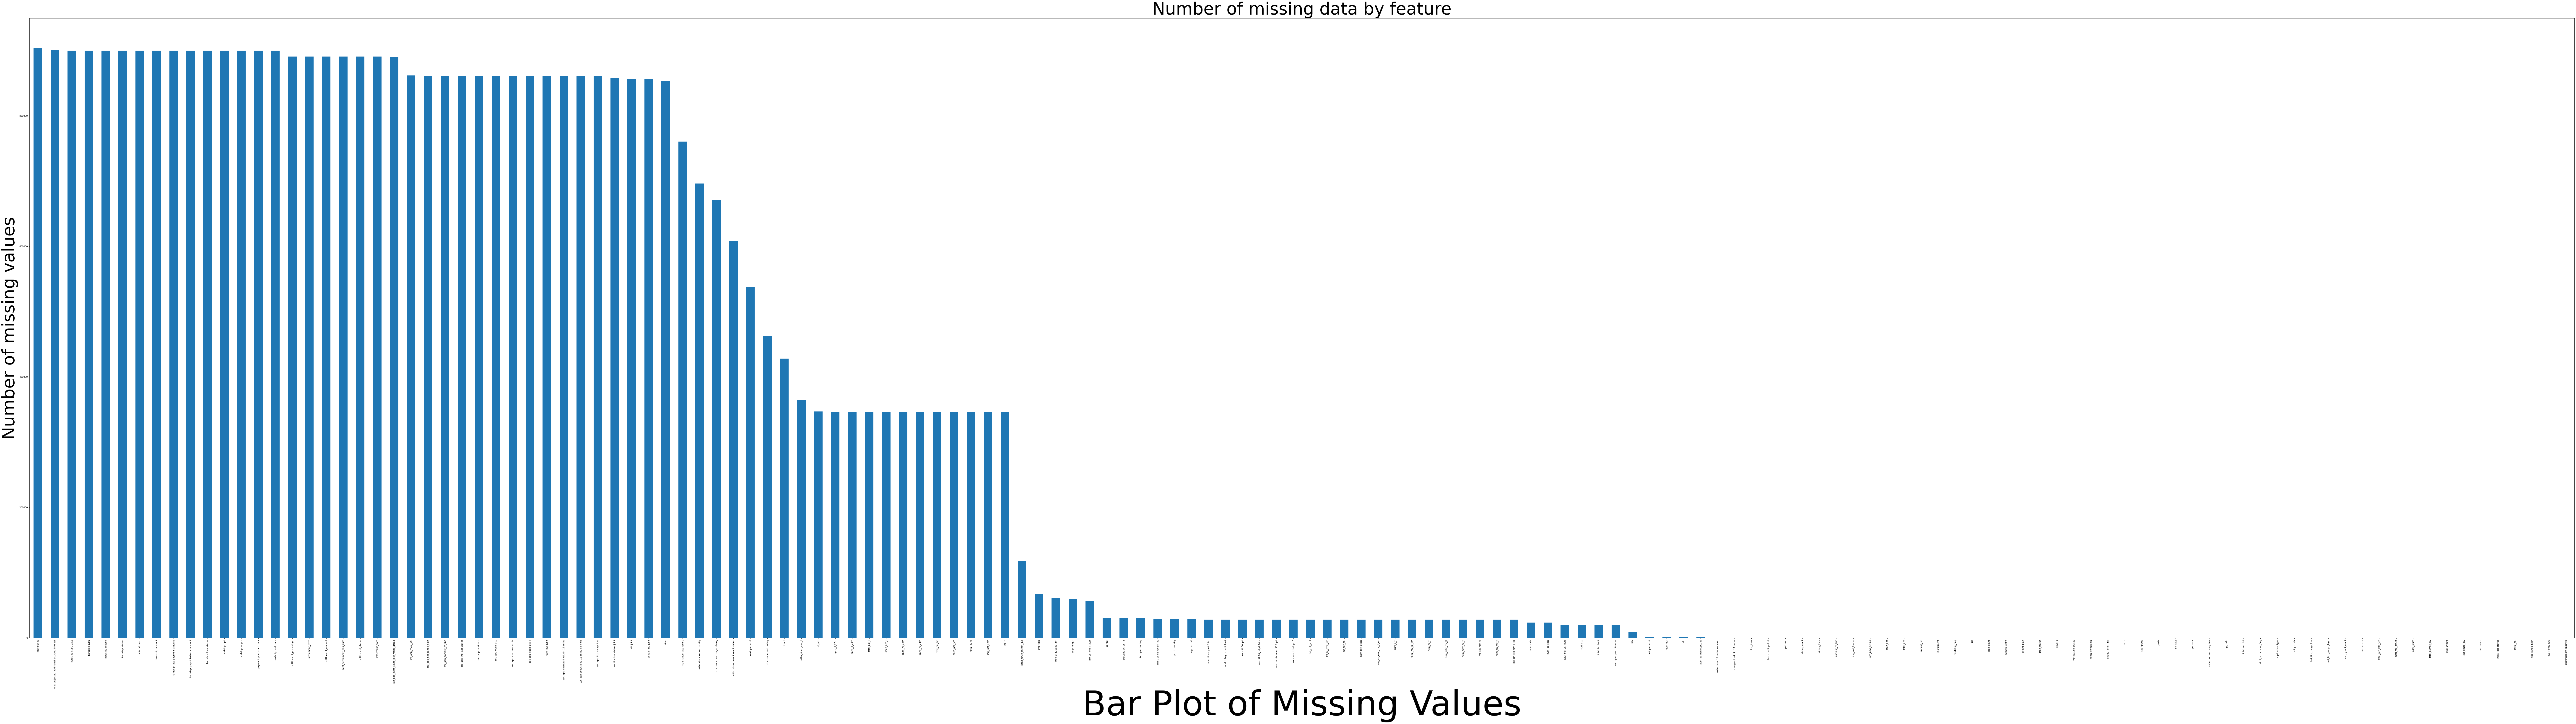

In [ ]:
# Plot missing values
plt.figure(figsize=(200,50))
missing= Accepted_data.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=150)
plt.ylabel("Number of missing values", fontsize=75)
plt.title("Number of missing data by feature", fontsize=75)
missing.plot(kind="bar")

plt.show()

In [ ]:
Accepted_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904280 entries, 1557444 to 1267175
Data columns (total 151 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          904280 non-null  object 
 1   member_id                                   0 non-null       float64
 2   loan_amnt                                   904263 non-null  float64
 3   funded_amnt                                 904263 non-null  float64
 4   funded_amnt_inv                             904263 non-null  float64
 5   term                                        904263 non-null  object 
 6   int_rate                                    904263 non-null  float64
 7   installment                                 904263 non-null  float64
 8   grade                                       904263 non-null  object 
 9   sub_grade                                   904263 non-null  o

In [ ]:
# Create a new dataframe with 80% value retention
df = Accepted_data.dropna(axis=1, thresh=int(0.75*len(Accepted_data)))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1557444,132555889,11000.0,11000.0,11000.0,36 months,10.90,359.61,B,B4,Heavy Equipment Operator,8 years,RENT,36000.0,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,169xx,PA,16.10,0.0,Apr-2008,675.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,w,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,...,15093.0,37600.0,8.0,686.0,13699.0,47.9,0.0,0.0,NaN,120.0,2.0,2.0,0.0,4.0,1.0,0.0,12.0,14.0,13.0,14.0,0.0,22.0,24.0,14.0,22.0,0.0,0.0,0.0,3.0,100.0,38.5,0.0,0.0,37600.0,15093.0,26300.0,0.0,N,DirectPay,N
1089926,69743499,12000.0,12000.0,12000.0,36 months,6.99,370.48,A,A3,RN,9 years,MORTGAGE,86000.0,Not Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,773xx,TX,19.84,0.0,Apr-2000,685.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,w,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,...,234402.0,33005.0,3.0,12336.0,2202.0,41.0,0.0,0.0,153.0,189.0,19.0,5.0,1.0,32.0,2.0,0.0,3.0,14.0,9.0,10.0,11.0,14.0,26.0,12.0,19.0,NaN,0.0,0.0,1.0,95.0,66.7,0.0,0.0,288684.0,32365.0,6605.0,36393.0,N,Cash,N
71683,63590274,5000.0,5000.0,5000.0,36 months,12.05,166.20,C,C1,Product Picker,1 year,RENT,25000.0,Source Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,490xx,MI,16.95,0.0,Jul-2010,660.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,w,0.00,0.00,5777.950141,5777.95,5000.00,777.95,...,20751.0,4300.0,7.0,3459.0,NaN,NaN,0.0,0.0,38.0,64.0,16.0,8.0,0.0,NaN,13.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,5.0,1.0,6.0,0.0,0.0,0.0,3.0,90.0,NaN,0.0,0.0,25139.0,20751.0,0.0,20839.0,N,Cash,N
356146,42364040,20000.0,20000.0,19975.0,36 months,15.61,699.30,D,D1,Graphic Artist,8 years,RENT,40000.0,Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,900xx,CA,34.56,0.0,Feb-1987,705.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,f,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,...,40789.0,66700.0,1.0,4079.0,26095.0,60.9,0.0,0.0,72.0,336.0,24.0,24.0,0.0,24.0,NaN,0.0,8.0,8.0,8.0,12.0,1.0,8.0,14.0,8.0,10.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,67764.0,40789.0,66700.0,0.0,N,Cash,N
1396198,144254317,5000.0,5000.0,5000.0,36 months,18.94,183.13,D,D2,Guidance director,10+ years,RENT,68000.0,Source Verified,Nov-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,330xx,FL,35.58,16.0,Apr-2001,660.0,664.0,0.0,15.0,0.0,9301.0,80.9,42.0,w,4682.40,4682.40,544.130000,544.13,317.60,226.53,...,224839.0,11500.0,2.0,14989.0,1998.0,75.9,0.0,0.0,164.0,211.0,19.0,19.0,0.0,79.0,18.0,2.0,3.0,6.0,3.0,18.0,18.0,6.0,24.0,6.0,15.0,0.0,0.0,2.0,0.0,59.5,66.7,0.0,0.0,218138.0,224839.0,8300.0,206638.0,N,Cash,N


In [ ]:
# Get null values for each column
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

id : 0
loan_amnt : 17
funded_amnt : 17
funded_amnt_inv : 17
term : 17
int_rate : 17
installment : 17
grade : 17
sub_grade : 17
emp_title : 66906
emp_length : 58978
home_ownership : 17
annual_inc : 19
verification_status : 17
issue_d : 17
loan_status : 17
pymnt_plan : 17
url : 17
purpose : 17
title : 9188
zip_code : 17
addr_state : 17
dti : 681
delinq_2yrs : 33
earliest_cr_line : 33
fico_range_low : 17
fico_range_high : 17
inq_last_6mths : 33
open_acc : 33
pub_rec : 33
revol_bal : 17
revol_util : 733
total_acc : 33
initial_list_status : 17
out_prncp : 17
out_prncp_inv : 17
total_pymnt : 17
total_pymnt_inv : 17
total_rec_prncp : 17
total_rec_int : 17
total_rec_late_fee : 17
recoveries : 17
collection_recovery_fee : 17
last_pymnt_d : 949
last_pymnt_amnt : 17
last_credit_pull_d : 48
last_fico_range_high : 17
last_fico_range_low : 17
collections_12_mths_ex_med : 78
policy_code : 17
application_type : 17
acc_now_delinq : 33
tot_coll_amt : 28116
tot_cur_bal : 28116
total_rev_hi_lim : 28116
ac

In [ ]:
# Create a new dataframe that includes valuable columns for prediction
df = df.filter(['loan_amnt', 'term','int_rate','installment','grade','sub_grade','emp_length','home_ownership', 'issue_d', 'pymnt_plan'
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status', 'zip_code', 
                'avg_cur_bal', 'revol_bal'])
df.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
issue_d                 object
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
zip_code                object
avg_cur_bal            float64
revol_bal              float64
dtype: object

In [ ]:
df.shape

(904280, 17)

In [ ]:
# Remove string characters in 'emp_length' column
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

# Remove string characters in 'zipcode' column
df['zip_code'] = df['zip_code'].str.replace(r'\D', '')

# Drop the null rows since we have sufficient amount of data
df = df.dropna(axis=0)

# Check for null values
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

loan_amnt : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_length : 0
home_ownership : 0
issue_d : 0
verification_status : 0
purpose : 0
dti : 0
delinq_2yrs : 0
loan_status : 0
zip_code : 0
avg_cur_bal : 0
revol_bal : 0


In [ ]:
# remove "months" from "36 months" and convert it to int type
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

Text(0, 0.5, 'Loan Amount')

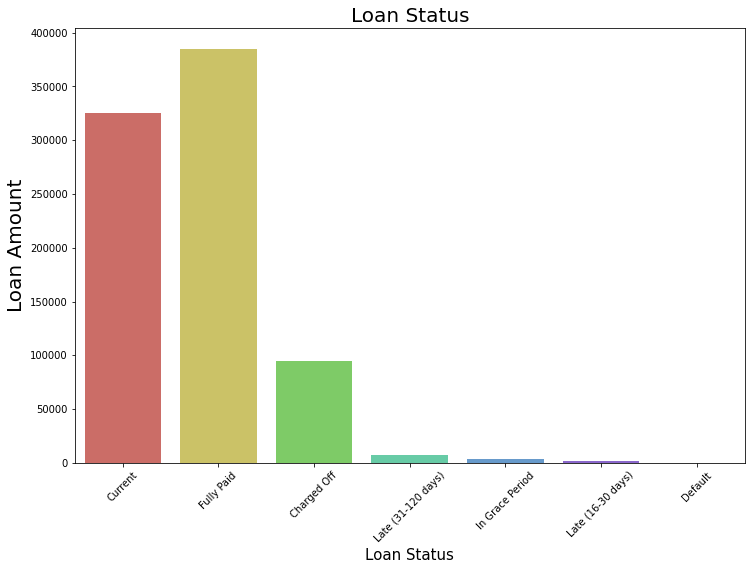

In [ ]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

**TARGET VARIABLE**

In [ ]:
df["loan_status"].value_counts()

Fully Paid            384953
Current               325402
Charged Off            95052
Late (31-120 days)      7797
In Grace Period         3182
Late (16-30 days)       1540
Default                    7
Name: loan_status, dtype: int64

In [ ]:
# Create a target variable "Loan Status" with two categories Good and Bad Loan
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status== "Charged Off") |
                        (df.loan_status == 'Default'), 1, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Loan Amount')

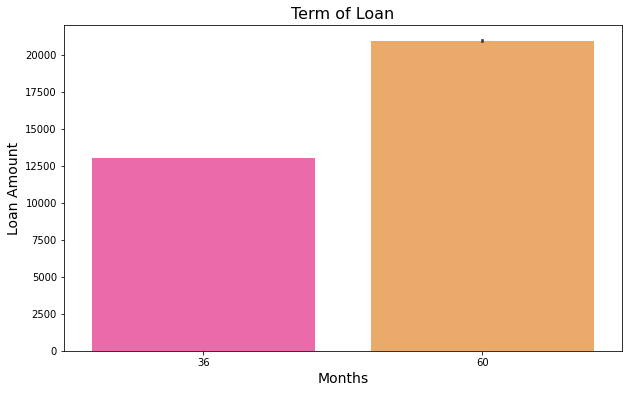

In [ ]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(10,6))
sns.barplot("term", "loan_amnt", data=df, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- Loan Amount')

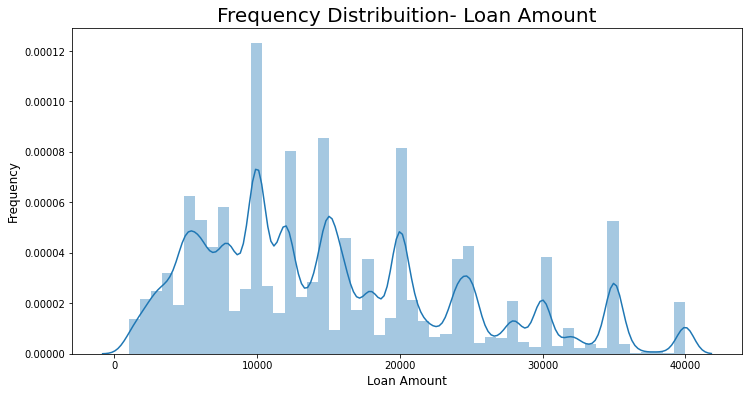

In [ ]:
# Frequency distribution of Loan Amount
plt.figure(figsize=(12,6))
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


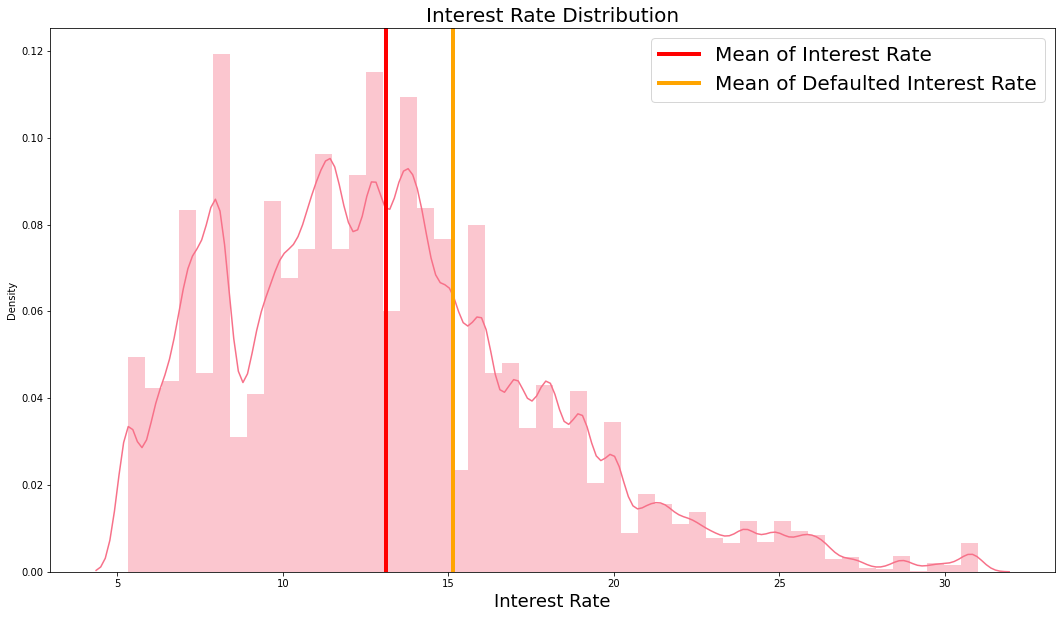

In [ ]:
# Set new variable name to include only loans that are defaulted
default_vis = df[df.loan_status == 'Default']

# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df['int_rate'], hist='density')
plt.axvline(x=df.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [ ]:
print("The difference in mean between the two interest rates is:", default_vis.int_rate.mean() - df.int_rate.mean())

The difference in mean between the two interest rates is: 2.040418740153976


Text(0.5, 0, 'Count')

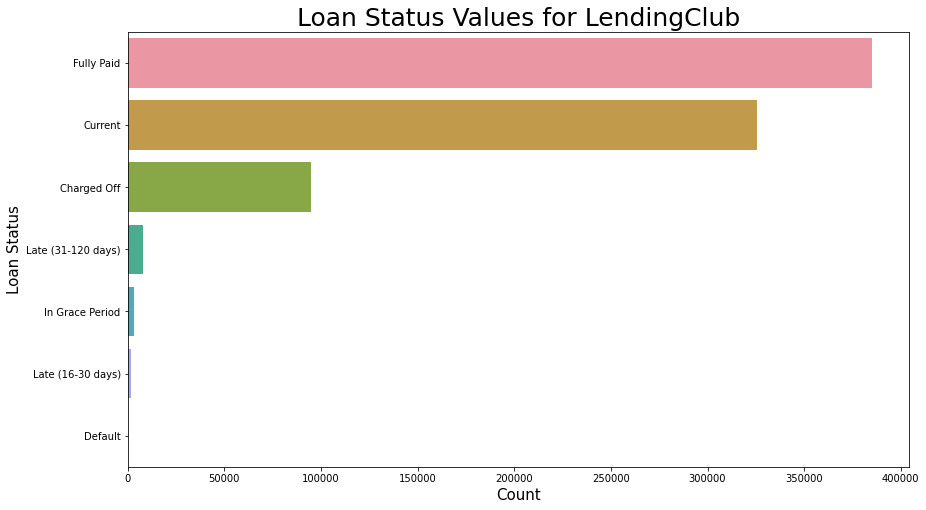

In [ ]:
# Set a new variable for the purpose of displaying the value counts of 'loan_status'
loan_status_vis = df['loan_status'].value_counts()

# Plot the value counts
plt.figure(figsize=(14,8))
sns.barplot(y=loan_status_vis.index, x=loan_status_vis)
plt.title('Loan Status Values for LendingClub', fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count', fontsize=15)

Text(0, 0.5, 'Loan Amount')

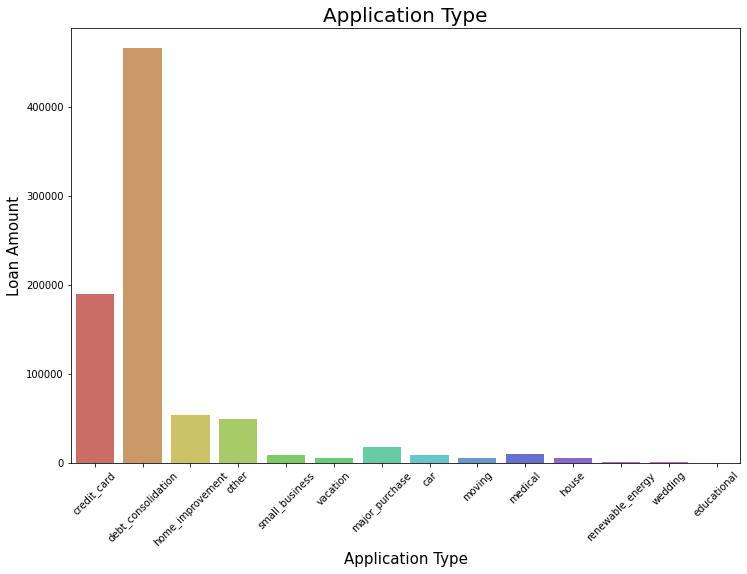

In [ ]:
# Application Type and Loan Amount
plt.figure(figsize = (12,8))
g = sns.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

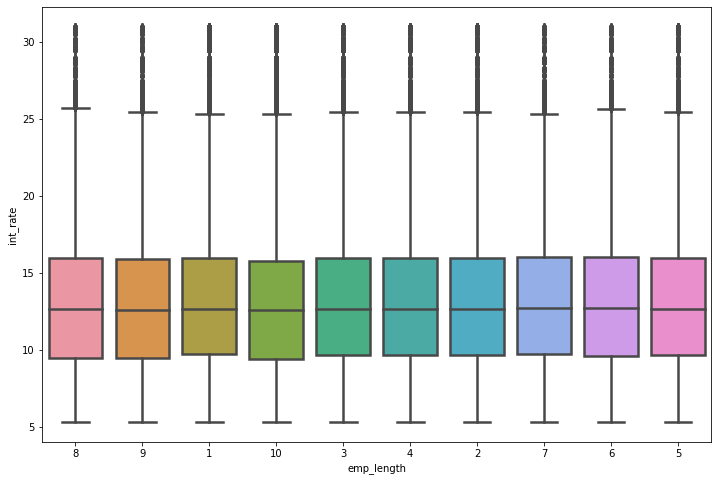

In [ ]:
# Boxplot of Employment Length and Inter
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=df, linewidth=2.5)

plt.show()

Text(0.5, 0, 'Count')

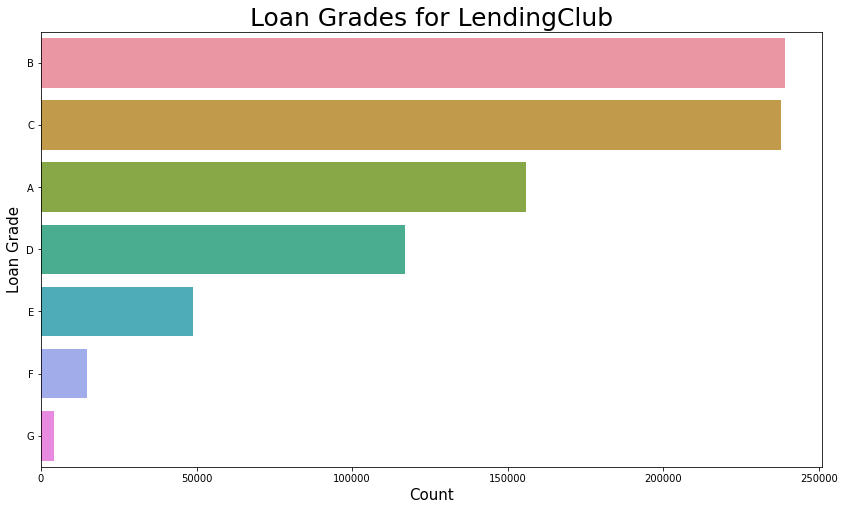

In [ ]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = df['grade'].value_counts()

# Plot the value counts
plt.figure(figsize=(14,8))

sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

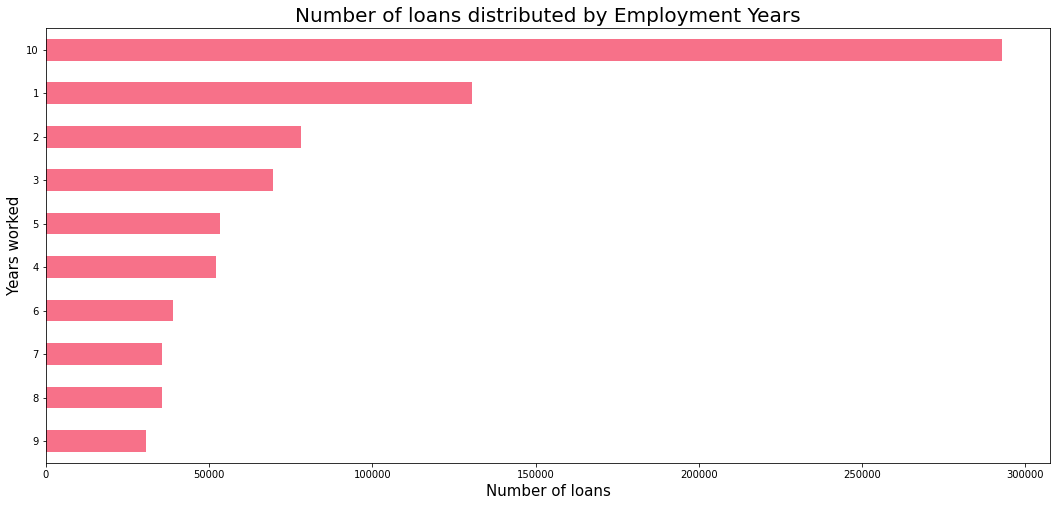

In [ ]:
# Employment Length and Number of Loans
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

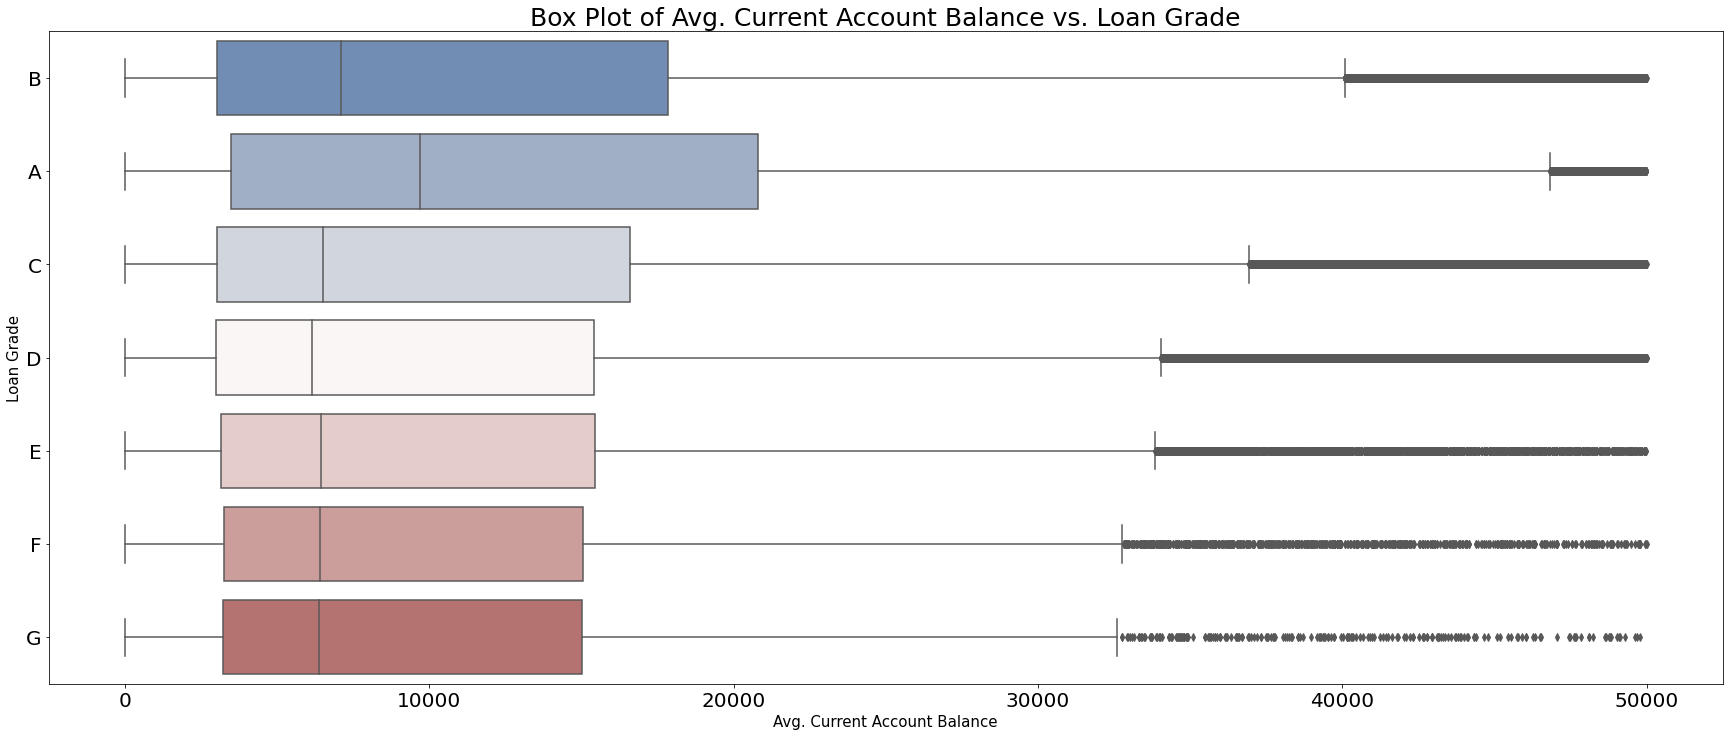

In [ ]:
# Drop values from df that are more than 50,000
avg_cur_bal_vis = df[df.avg_cur_bal < 50000]

# Plot the borrower's avg current balance compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="avg_cur_bal", y="grade", data=avg_cur_bal_vis, palette="vlag")
plt.title('Box Plot of Avg. Current Account Balance vs. Loan Grade', fontsize=25)
plt.xlabel('Avg. Current Account Balance', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

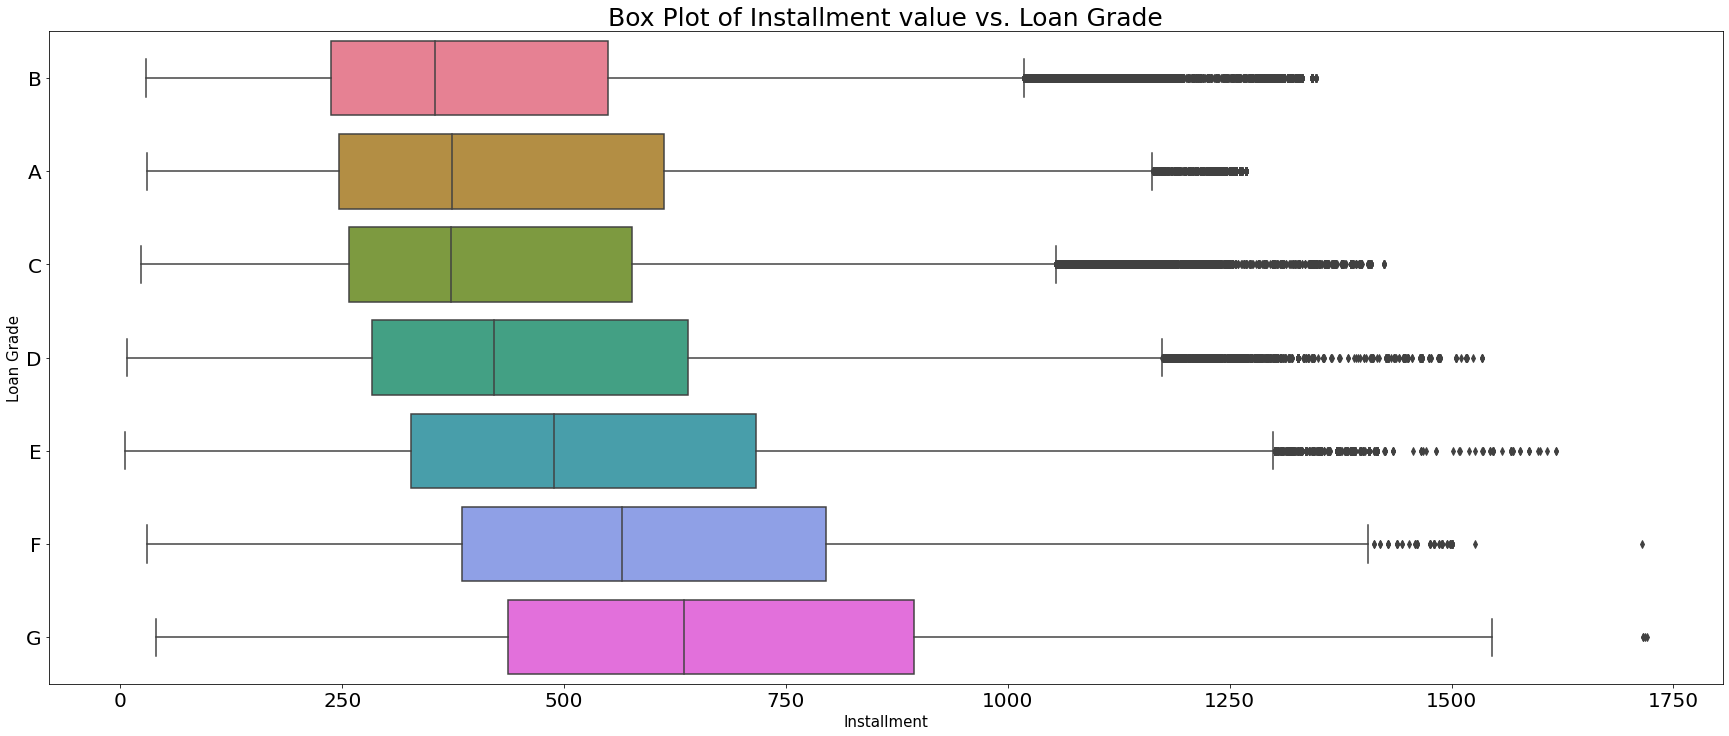

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=df, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


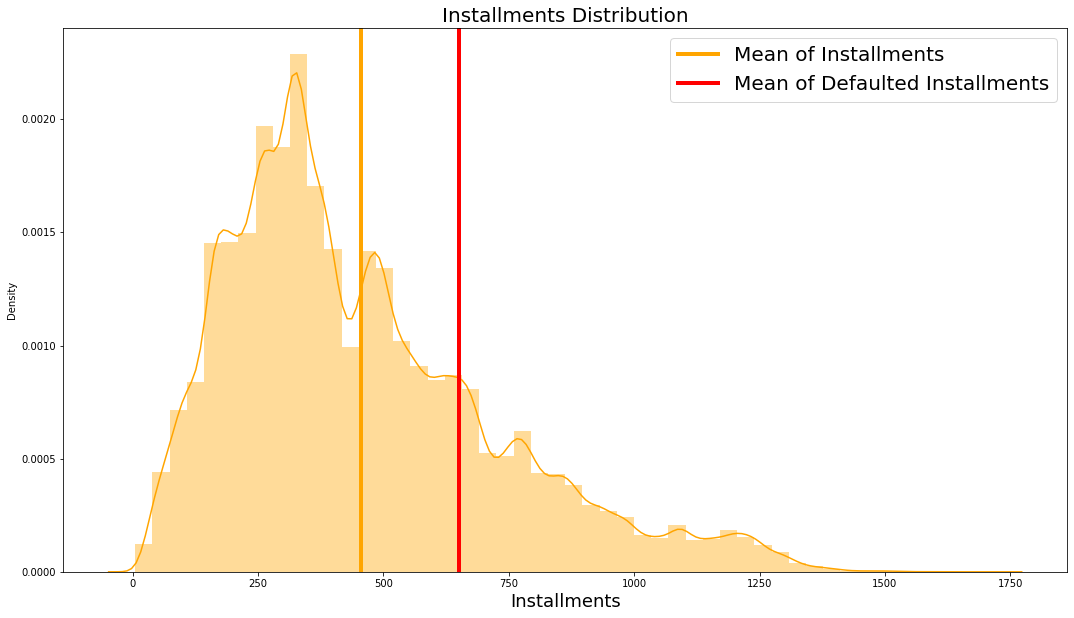

In [ ]:
# Visualize the distribution of installments
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df['installment'], hist='density', color='orange')
plt.axvline(x=df.installment.mean(), color='orange', linestyle='-', lw=4, label='Mean of Installments')
plt.axvline(x=default_vis.installment.mean(), color='red', linestyle='-', lw=4, label='Mean of Defaulted Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [ ]:
print("The difference in mean between the two installment values is:", default_vis.installment.mean() - df.installment.mean())

The difference in mean between the two installment values is: 196.573495532469


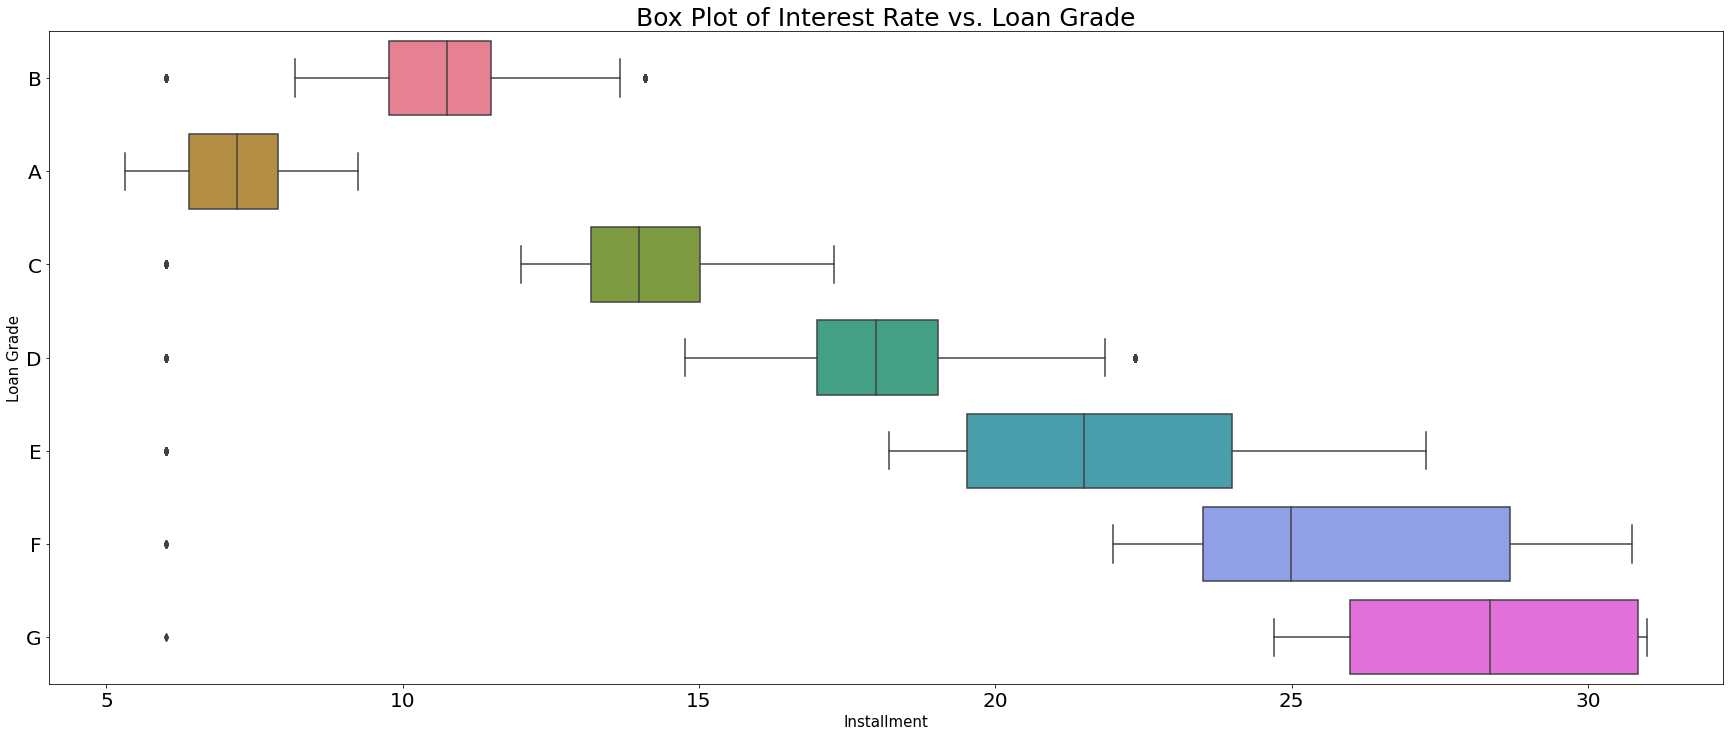

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="int_rate", y="grade", data=df, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

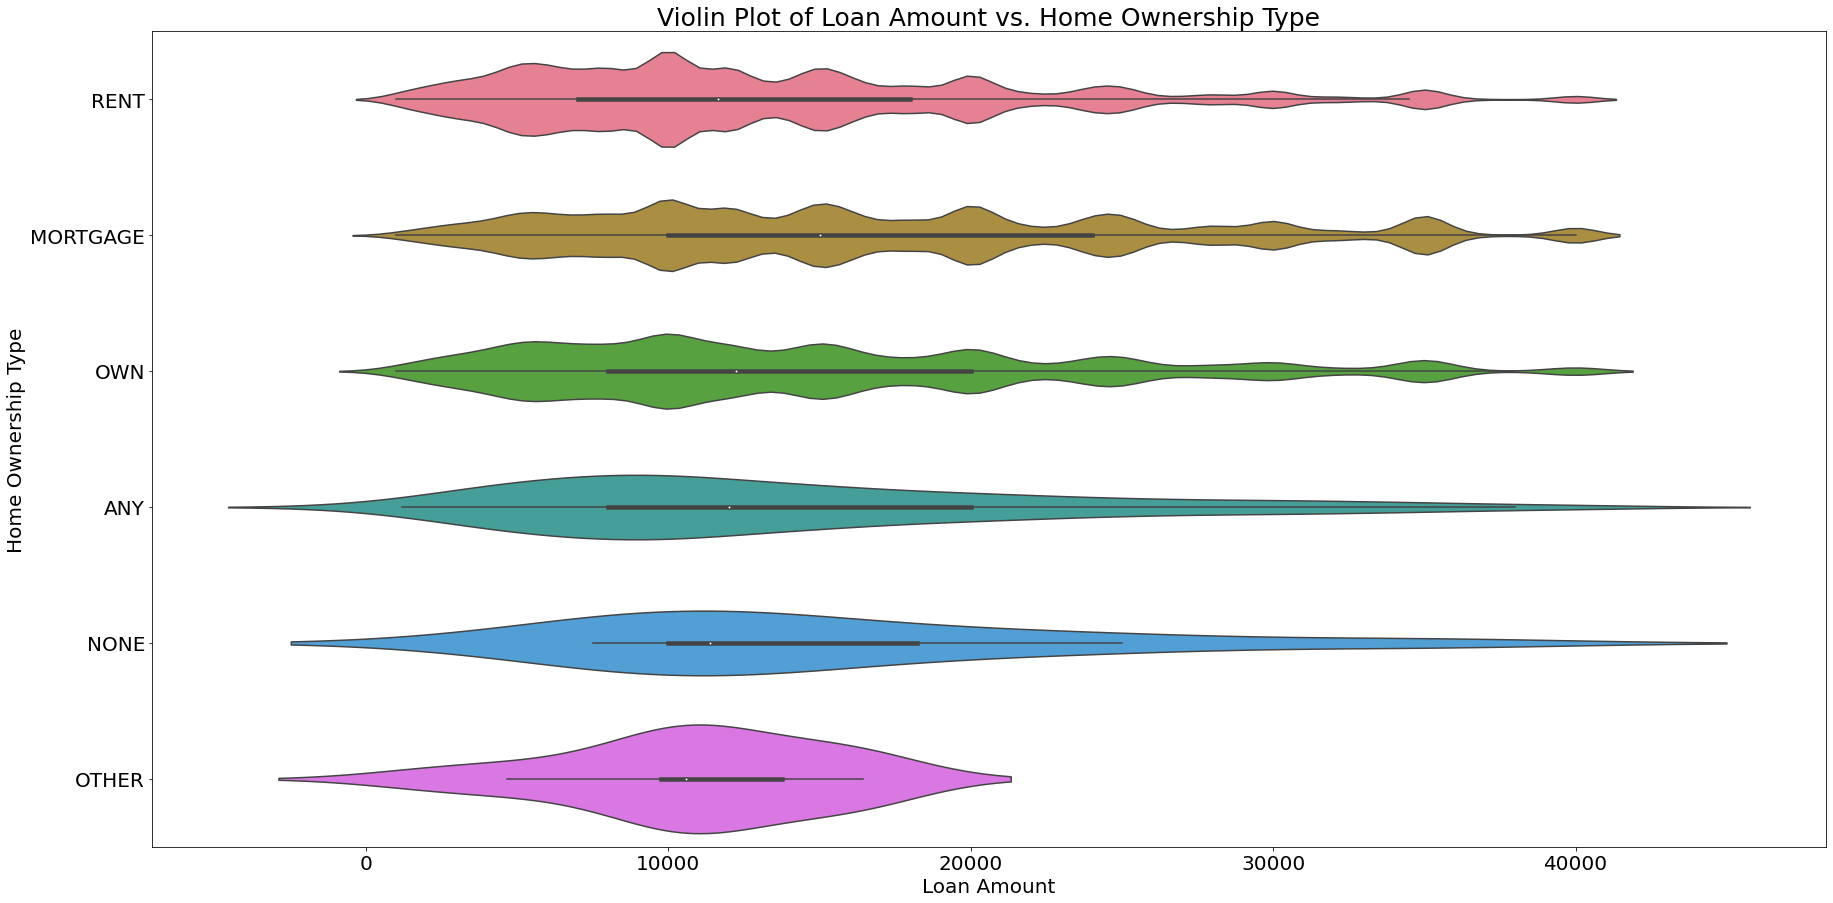

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=df, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

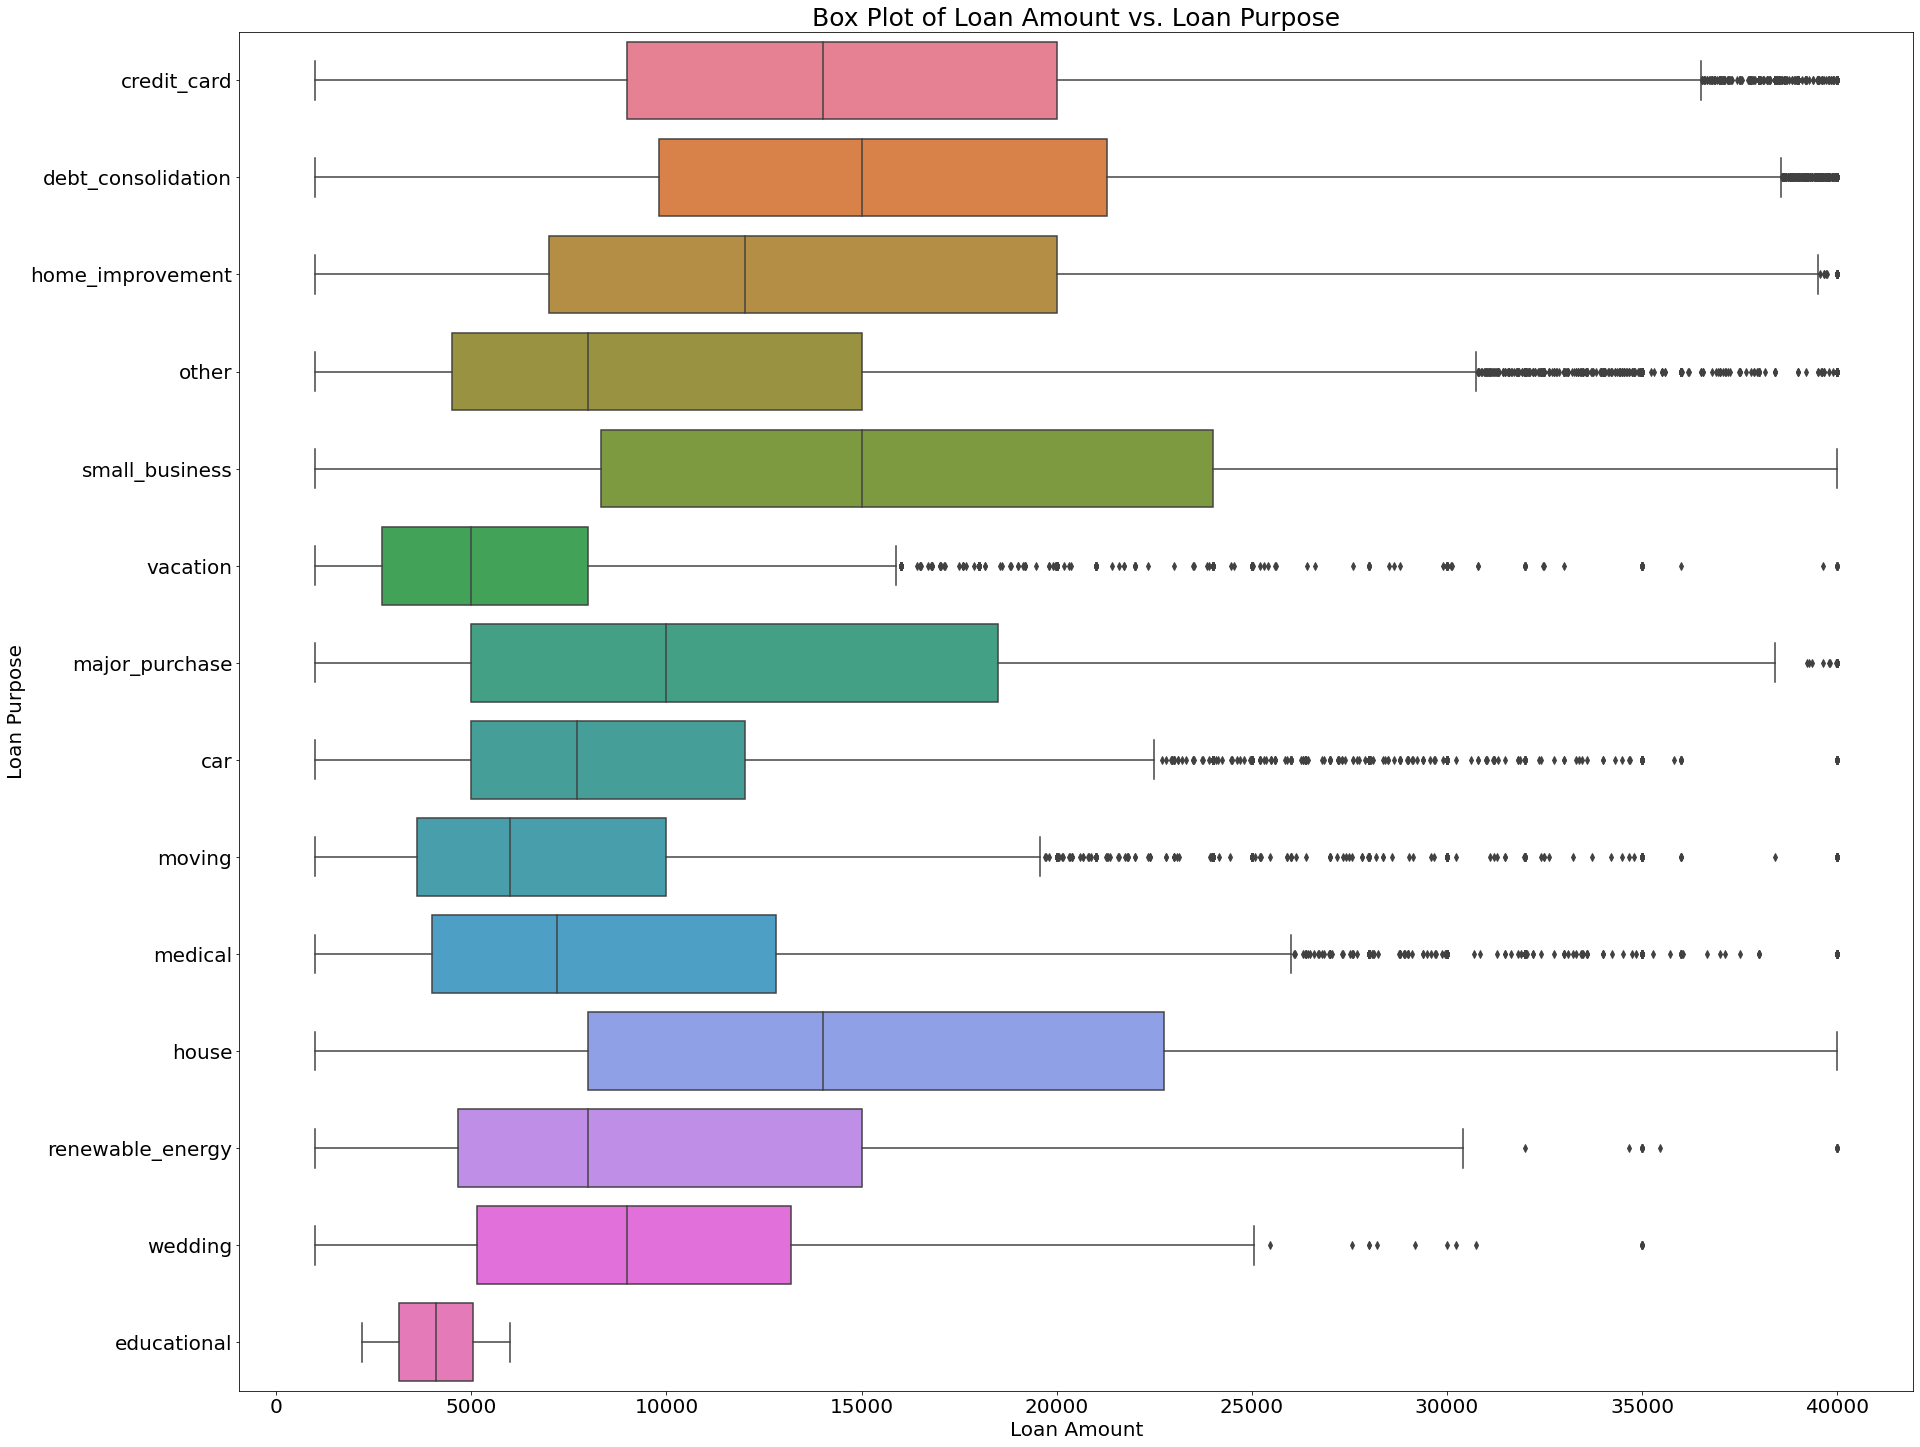

In [ ]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=df, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

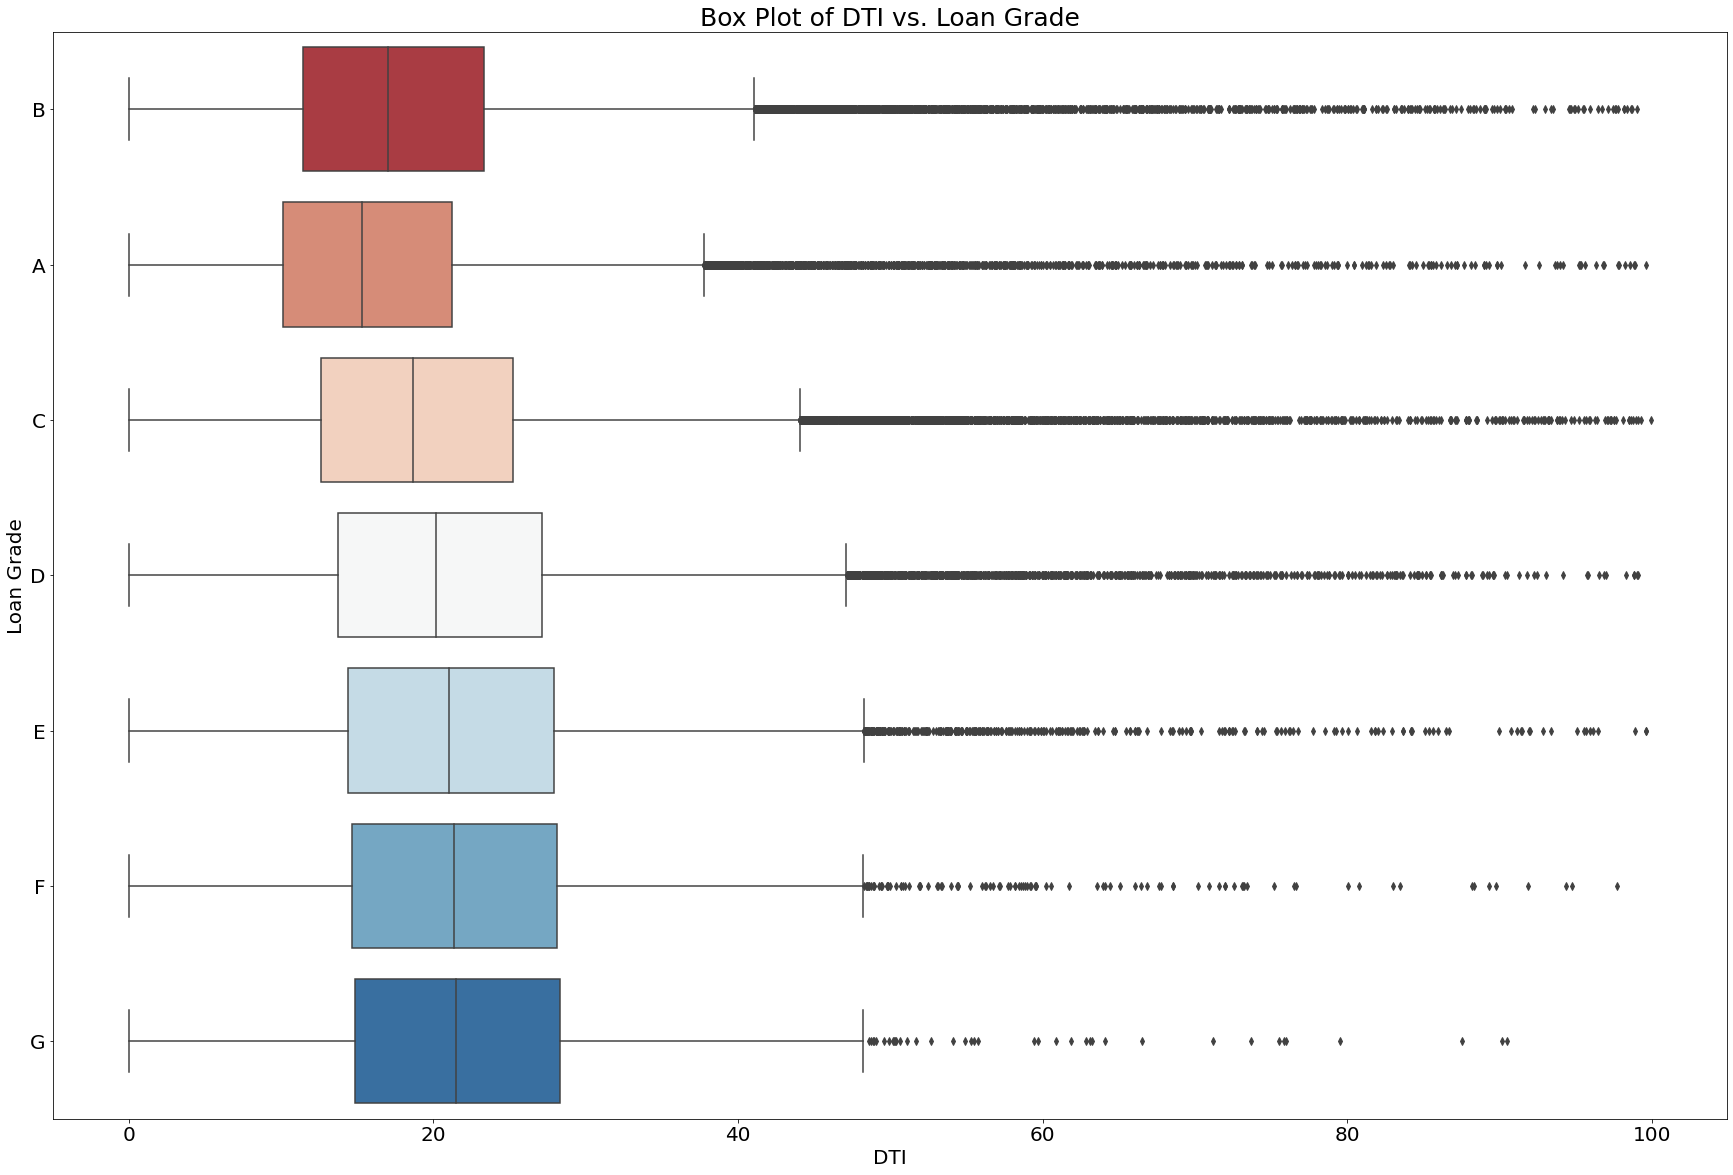

In [ ]:
# Drop values from df that are more than 100
dti_vis = df[df.dti < 100]

# Plot the borrower's DTI compared to load grade
plt.figure(figsize=(30,20))
sns.boxplot(x="dti", y="grade", data=dti_vis, palette="RdBu")
plt.title('Box Plot of DTI vs. Loan Grade', fontsize=25)
plt.xlabel('DTI', fontsize=20)
plt.ylabel('Loan Grade', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Text(0, 0.5, 'Loan Amount')

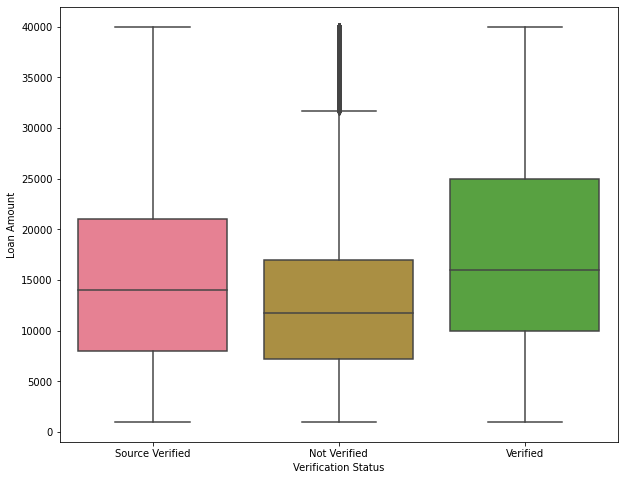

In [ ]:
# Boxplot of Verification Status and Loan Amount
plt.figure(figsize=(10,8))
sns.boxplot(x=df.verification_status, y=df.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

In [ ]:
# Crosstabulation of Purpose and Loan Status
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[purp_loan[0]], df[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,
car,727,3376,1,4013,28,14,74
credit_card,17867,80254,0,88964,646,302,1477
debt_consolidation,58964,176737,4,222726,1837,894,4512
educational,0,1,0,1,0,0,0
home_improvement,5439,21910,1,25143,212,107,501
house,562,2471,0,1920,30,15,84
major_purchase,1927,7415,0,7941,76,35,195
medical,1129,4050,1,4229,41,11,105
moving,703,2085,0,2495,20,15,71


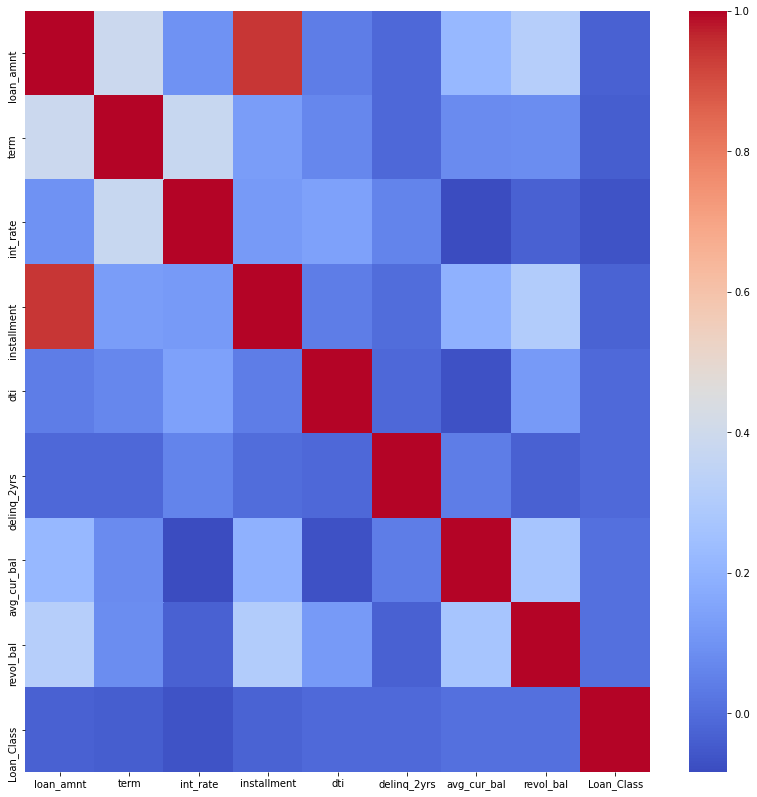

In [ ]:
# Set correlation variable
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

In [ ]:
# Convert into One Hot Encoding
# categorical_features.columns
import datetime
from sklearn.preprocessing import LabelEncoder
cols= ['sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'loan_amnt', 'term','int_rate', 'installment', 'grade', 'dti', 'delinq_2yrs', 'zip_code', 'avg_cur_bal', 'revol_bal']

for i in cols:
    lbl= LabelEncoder()
    lbl.fit(list(df[i].values))
    df[i]= lbl.transform(list(df[i].values))
# Check correlation between Loan_Class and all other independent variables
correlation_m = df.corr()
correlation_m["Loan_Class"].sort_values(ascending=False)

Loan_Class             1.000000
revol_bal              0.009493
avg_cur_bal            0.008671
zip_code               0.006508
emp_length             0.004887
issue_d               -0.002918
delinq_2yrs           -0.009428
dti                   -0.010981
purpose               -0.011912
home_ownership        -0.012862
verification_status   -0.016655
installment           -0.027450
loan_amnt             -0.028697
term                  -0.036958
grade                 -0.053313
sub_grade             -0.055946
int_rate              -0.062876
loan_status           -0.353129
Name: Loan_Class, dtype: float64

In [ ]:
df_model = Accepted_data

In [ ]:
# Drop the installment column to reduce multi correlations
df_model = df_model.drop(['installment'], axis=1)

In [ ]:
# Dropping columns
df_model = df_model[df_model.loan_status != 'Current']
df_model = df_model[df_model.loan_status != 'In Grace Period']
df_model = df_model[df_model.loan_status != 'Late (16-30 days)']
df_model = df_model[df_model.loan_status != 'Late (31-120 days)']
df_model = df_model[df_model.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df_model = df_model[df_model.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df_model = df_model[df_model.loan_status != 'Issued']
df_model = df_model[df_model.loan_status != 'Default']
df_model = df_model[df_model.loan_status != 'NaN']

In [ ]:
df_model = df_model.loc[df_model['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [ ]:
# Combining charged off and defaulted columns
df_model['loan_status'] = df_model['loan_status'].replace({'Charged Off':'Default'})
df_model['loan_status'].value_counts()

Fully Paid    430206
Default       107486
Name: loan_status, dtype: int64

In [ ]:
df_model = df

In [ ]:
# Retrieve datatypes
df_model.dtypes

loan_amnt              int64
term                   int64
int_rate               int64
installment            int64
grade                  int64
sub_grade              int64
emp_length             int64
home_ownership         int64
issue_d                int64
verification_status    int64
purpose                int64
dti                    int64
delinq_2yrs            int64
loan_status            int64
zip_code               int64
avg_cur_bal            int64
revol_bal              int64
Loan_Class             int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

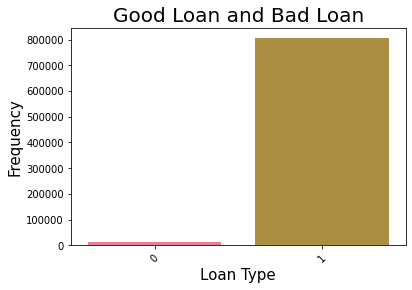

In [ ]:
# Countplot of Good Loans and Bad Loans
g= sns.countplot(df["Loan_Class"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Type", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

In [ ]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != "Loan_Class"]
y = df["Loan_Class"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**APPLY MODELS**

In [ ]:
# Logistic Regression
log= LogisticRegression()
log.fit(X_train, y_train)

y_pred= log.predict(X_test)

# Summary of the prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00    161001

    accuracy                           1.00    163587
   macro avg       1.00      1.00      1.00    163587
weighted avg       1.00      1.00      1.00    163587

[[  2586      0]
 [     0 161001]]
Accuracy of the model is:  1.0


In [ ]:
# Naive Bayes
naive= GaussianNB()
naive.fit(X_train, y_train)

y_pred= naive.predict(X_test)

# Summary of prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      2586
           1       1.00      1.00      1.00    161001

    accuracy                           0.99    163587
   macro avg       0.96      0.84      0.89    163587
weighted avg       0.99      0.99      0.99    163587

[[  1784    802]
 [   140 160861]]
Accuracy of the model is:  0.9942415962148582


**SMOTE OVERFITTING**

In [ ]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Over Sampling
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_sample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Before OverSampling, counts of label '1': 644413
Before OverSampling, counts of label '0': 9933 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, counts of label '1': 644413
After OverSampling, counts of label '0': 644413


In [ ]:
# Naive Bayes
naive= GaussianNB()
naive.fit(X_train, y_train)

y_pred= naive.predict(X_test)

# Summary of prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      2586
           1       1.00      1.00      1.00    161001

    accuracy                           0.99    163587
   macro avg       0.96      0.84      0.89    163587
weighted avg       0.99      0.99      0.99    163587

[[  1784    802]
 [   140 160861]]
Accuracy of the model is:  0.9942415962148582


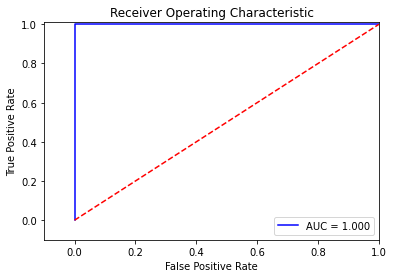

In [ ]:
tmp = log.fit(X_train_res, y_train_res.ravel())
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**SMOTE UNDERFITTING**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Under Sampling
rus = RandomUnderSampler(random_state=0)
X_train_res, y_train_res = rus.fit_sample(X_train, y_train.ravel())

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 644413
Before OverSampling, counts of label '0': 9933 

After UnderSampling, counts of label '1': 9933
After UnderSampling, counts of label '0': 9933


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Naive Bayes
naive= GaussianNB()
naive.fit(X_train, y_train)

y_pred= naive.predict(X_test)

# Summary of prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      2586
           1       1.00      1.00      1.00    161001

    accuracy                           0.99    163587
   macro avg       0.96      0.84      0.89    163587
weighted avg       0.99      0.99      0.99    163587

[[  1784    802]
 [   140 160861]]
Accuracy of the model is:  0.9942415962148582


**UNBALANCED**

In [ ]:
# Writing a for-loop to shift the data towards normality
numerical = df_model.columns[df_model.dtypes == 'int64']
for i in numerical:
    if df_model[i].min() > 0:
        transformed, lamb = boxcox(df_model.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_model.loc[df[i].notnull(), i] = transformed

# One-hot encoding seperate columns for each level of category
df_model = pd.get_dummies(df_model, drop_first=True)

# Splitting the data using scikitlearn train_test_split (70/30)
traindata, testdata = train_test_split(df_model, stratify=df_model['loan_status'],test_size=0.3, random_state=17)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)

# Scaling the data so that each column has a mean of zero and unit standard deviation
# X_unbalance and y_unbalance are the independent and target variable
sc = StandardScaler()
X_unbalance = traindata.drop('loan_status', axis=1)
y_unbalance = traindata['loan_status']
numerical = X_unbalance.columns[(X_unbalance.dtypes == 'int64') | (X_unbalance.dtypes == 'int64')].tolist()
X_unbalance[numerical] = sc.fit_transform(X_unbalance[numerical])

## Checking the shape of train data
y_unbalance.shape

(572553,)

In [ ]:
def createROC(models, X, y, X_test, y_test):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)

        fp, tp, threshold = roc_curve(y_test, models[i].predict_proba(X_test)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
        
    return true_p, false_p ##returning the true postive and false positive

In [ ]:
# Create a best estimate by running the unbalanced dataset through each initial model
# Then scoring the model using 3-fold cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_unbalance - np.min(X_unbalance) + 1, y_unbalance, cv=3)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.47453773 0.401727   0.40172176] 0.42599549736006975
MNB [0.53432783 0.53638702 0.53495659] 0.5352238133412976
RF [0.69814672 0.69895363 0.69799477] 0.6983650421882341


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**BALANCED**

In [ ]:
y_default = traindata[traindata['loan_status'] == 0]
n_paid = traindata[traindata['loan_status'] == 1].sample(n=len(y_default), random_state=17) 

# Creating a new dataframe for balanced set
data = y_default.append(n_paid) 

# Creating the independent and dependent array
X_balance = data.drop('loan_status', axis=1)
y_balance = data['loan_status']

# Check the length of each sample
print(len(n_paid))
print(len(y_default))

# Scaling the dataframe once again with the new balanced set
numerical = X_balance.columns[(X_balance.dtypes == 'int64') | (X_balance.dtypes == 'int64')].tolist()
X_balance[numerical] = sc.fit_transform(X_balance[numerical])

# Running the dataset through each iteration of the model once again
models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_balance - np.min(X_balance) + 1,
                                    y_balance, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))

66536
66536
LDA [0.77139786 0.77122827 0.76920954] 0.7706118878495127
MNB [0.70703758 0.70779648 0.70315707] 0.705997045993174
RF [0.87719643 0.87762044 0.87764436] 0.8774870806379141
LR [0.77742433 0.77638098 0.77530992] 0.7763717412325789


**ANN**

In [ ]:
w_p = df.loan_status.value_counts()[0] / df.shape[0]
w_n = df.loan_status.value_counts()[1] / df.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.11621000742114575
Weight of negative values 0.39783454145999736


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler


X = df.drop('loan_status', axis=1)
y = df.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(572553, 17)
(245380, 17)
(572553,)
(245380,)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

NameError: ignored

**RANDOM FOREST**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)